In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib

from pathlib import Path
from pymatgen.core import Structure, Composition, Element

from xenonpy.datatools import preset

# user-friendly print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Descriptor

In [10]:
element_info = preset.elements_completed
element_info

,atomic_number,atomic_radius,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,bulk_modulus,c6_gb,covalent_radius_cordero,covalent_radius_pyykko,...,num_s_valence,period,specific_heat,thermal_conductivity,vdw_radius,vdw_radius_alvarez,vdw_radius_mm3,vdw_radius_uff,sound_velocity,Polarizability
H,1.0,79.000000,154.0,14.100000,1.008000,20.280,56.799640,6.510000,31.0,32.0,...,1.0,1.0,1.122728,0.1805,110.0,120.0,162.0,288.6,1270.000000,0.666793
He,2.0,147.832643,134.0,31.800000,4.002602,4.216,85.106630,1.470000,28.0,46.0,...,2.0,1.0,5.188000,0.1513,140.0,143.0,153.0,236.2,970.000000,0.205052
Li,3.0,155.000000,220.0,13.100000,6.940000,1118.150,11.000000,1410.000000,128.0,133.0,...,1.0,2.0,3.489000,85.0000,182.0,212.0,255.0,245.1,6000.000000,24.330000
Be,4.0,112.000000,219.0,5.000000,9.012183,3243.000,130.000000,214.000000,96.0,102.0,...,2.0,2.0,1.824000,190.0000,153.0,198.0,223.0,274.5,13000.000000,5.600000
B,5.0,98.000000,205.0,4.600000,10.810000,3931.000,320.000000,99.200000,84.0,85.0,...,2.0,2.0,1.025000,27.0000,192.0,191.0,215.0,408.3,16200.000000,3.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Th,90.0,180.000000,289.0,19.800000,232.037700,5060.000,54.000000,2513.278129,206.0,175.0,...,2.0,7.0,0.113000,54.0000,245.0,293.0,274.0,339.6,2490.000000,32.100000
Pa,91.0,161.000000,285.0,15.000000,231.035880,4300.000,145.399684,2039.299326,200.0,169.0,...,2.0,7.0,0.121000,47.0000,243.0,288.0,264.0,342.4,5621.547555,25.400000
U,92.0,138.000000,283.0,12.500000,238.028910,4018.000,100.000000,2491.292580,196.0,170.0,...,2.0,7.0,0.115000,27.0000,241.0,271.0,252.0,339.5,3155.000000,24.900000
Np,93.0,130.000000,280.0,21.100000,237.000000,4175.000,124.101714,2398.576467,190.0,171.0,...,2.0,7.0,0.543388,6.0000,239.0,282.0,252.0,342.4,2999.089592,24.800000


In [14]:
from xenonpy.descriptor import Compositions

featurizers = ['WeightedAverage', 'WeightedVariance', 'MaxPooling', 'MinPooling']
comp_calc = Compositions(featurizers=featurizers, n_jobs=20)  # use specific featurizers

load aba data

In [179]:
abe_dataset = joblib.load('common_data/abe_dataset_anneal.pkl')
abe_dataset = abe_dataset.rename(columns={'label': 'anneal'})

tmp = joblib.load('common_data/abe_dataset_meltspun.pkl').loc[abe_dataset.index]
abe_dataset = abe_dataset.assign(
    meltspun=tmp.label,
    elements=abe_dataset.composition.apply(lambda s: str(tuple(s.keys())))
)

abe_dataset

,composition,anneal,meltspun,elements
formula,,,,
Au 44.1 Al 34 Yb 17,"{'Au': 44.1, 'Al': 34.0, 'Yb': 17.0}",metastable,stable,"('Au', 'Al', 'Yb')"
Ag 50 In 36 Er 14,"{'Ag': 50.0, 'In': 36.0, 'Er': 14.0}",metastable,metastable,"('Ag', 'In', 'Er')"
Ag 48.6 In 37.1 Er 14.3,"{'Ag': 48.6, 'In': 37.1, 'Er': 14.3}",metastable,metastable,"('Ag', 'In', 'Er')"
Ag 50 In 36 Nd 14,"{'Ag': 50.0, 'In': 36.0, 'Nd': 14.0}",metastable,metastable,"('Ag', 'In', 'Nd')"
Au 49 Al 17 Ga 17 Yb 17,"{'Au': 49.0, 'Al': 17.0, 'Ga': 17.0, 'Yb': 17.0}",metastable,stable,"('Au', 'Al', 'Ga', 'Yb')"
...,...,...,...,...
Au 47 In 37 Gd 16,"{'Au': 47.0, 'In': 37.0, 'Gd': 16.0}",stable,stable,"('Au', 'In', 'Gd')"
Au 46 In 38 Gd 16,"{'Au': 46.0, 'In': 38.0, 'Gd': 16.0}",stable,stable,"('Au', 'In', 'Gd')"
Au 56 Cu 7 Al 10 In 13 Tb 14,"{'Au': 56.0, 'Cu': 7.0, 'Al': 10.0, 'In': 13.0...",stable,stable,"('Au', 'Cu', 'Al', 'In', 'Tb')"


/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='elements', ylabel='count'>

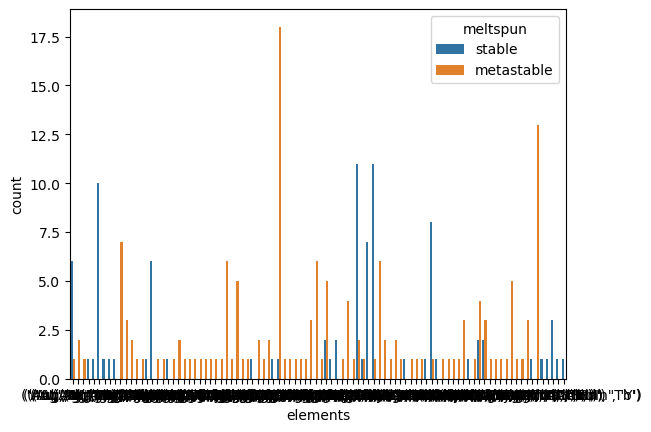

In [180]:
sns.countplot(abe_dataset, x="elements", hue="meltspun")

/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/.miniforge3/envs/xepy311/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='elements', ylabel='count'>

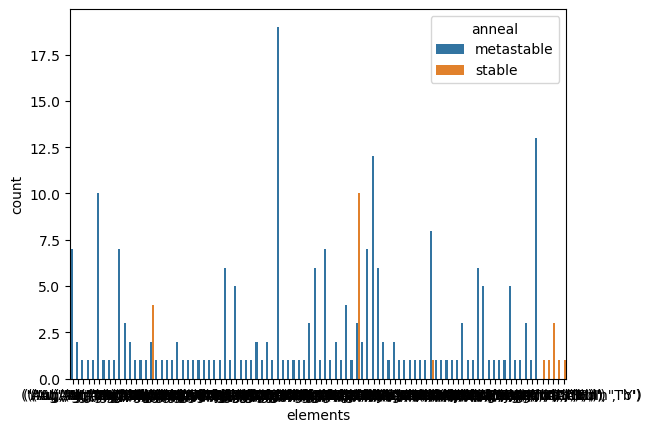

In [181]:
sns.countplot(abe_dataset, x="elements", hue="anneal")

In [36]:
comp_desc = comp_calc.fit_transform(abe_dataset)

comp_desc.head(3)
comp_desc.shape

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
formula,,,,,,,,,,,,,,,,,,,,,
Au 44.1 Al 34 Yb 17,53.794953,153.507886,239.764458,12.738381,131.917592,2669.926393,134.731861,725.349106,139.753943,132.93796,...,1.0,3.0,0.129,39.0,184.0,225.0,236.0,329.3,1590.0,5.80
Ag 50 In 36 Er 14,50.660000,156.680000,239.140000,13.378000,118.684840,2528.620000,84.669454,702.980000,150.080000,138.22000,...,1.0,5.0,0.168,15.0,193.0,243.0,243.0,314.8,1215.0,6.78
Ag 48.6 In 37.1 Er 14.3,50.745000,157.024000,239.512000,13.461700,118.939460,2529.121000,84.272577,711.729000,150.179000,138.48500,...,1.0,5.0,0.168,15.0,193.0,243.0,243.0,314.8,1215.0,6.78


(247, 232)

In [107]:
from typing import Union, List

from xenonpy.descriptor.base import BaseCompositionFeaturizer, BaseDescriptor
from xenonpy.datatools import preset

semi_meta = ['Al', 'Si', 'Ga', 'Ge', 'In', 'Sn', 'Tl', 'Pb']
radius = ['atomic_radius','atomic_radius_rahm','covalent_radius_cordero','covalent_radius_pyykko','covalent_radius_pyykko_double','covalent_radius_pyykko_triple','covalent_radius_slater','vdw_radius','vdw_radius_alvarez','vdw_radius_mm3','vdw_radius_uff']

class WeightedAverageSmM(BaseCompositionFeaturizer):

    def mix_function(self, elems, nums):
        w_ = nums / np.sum(nums)
    
        others = []
        semi = []
        for w, e in zip(w_, elems):
            val = self.elements.loc[e].values
            if e in semi_meta:
                semi.append(val)
                # print(f'semi: {e}')
                continue
            others.append(val)
            # print(f'other: {e}')
    
        return np.sum(np.array(semi), axis=0) / np.sum(np.array(others), axis=0)

    @property
    def feature_labels(self):
        return ['SMpM_ave:' + s for s in self.elements]


class WeightedAverageReM(BaseCompositionFeaturizer):

    def mix_function(self, elems, nums):
        w_ = nums / np.sum(nums)
    
        others = []
        semi = []
        for w, e in zip(w_, elems):
            val = self.elements.loc[e].values
            if e in semi_meta:
                semi.append(val)
                # print(f'semi: {e}')
                continue
            others.append(val)
            # print(f'other: {e}')
    
        return np.sum(np.array(semi), axis=0) / np.sum(np.array(others), axis=0)

    @property
    def feature_labels(self):
        return ['REpM_ave:' + s for s in self.elements]



class SMREComposition(BaseDescriptor):
    classic = ['WeightedAverageSmM', 'WeightedAverageReM']

    def __init__(self,
                 *,
                 elemental_info: Union[pd.DataFrame, None] = None,
                 n_jobs: int = -1,
                 featurizers: Union[str, List[str]] = 'classic',
                 on_errors: str = 'nan'):

        if featurizers == 'classic':
            super().__init__(featurizers=self.classic)
        else:
            super().__init__(featurizers=featurizers)

        self.composition = WeightedAverageSmM(n_jobs=n_jobs,
                                           on_errors=on_errors,
                                           elemental_info=elemental_info)
        self.composition = WeightedAverageReM(n_jobs=n_jobs,
                                       on_errors=on_errors,
                                       elemental_info=elemental_info)

In [105]:
sm_re_calc = SMREComposition(elemental_info=element_info[radius])
sm_re_desc = sm_re_calc.fit_transform(abe_dataset.composition)

sm_re_desc.head(3)
sm_re_desc.shape

,SMpM_ave:atomic_radius,SMpM_ave:atomic_radius_rahm,SMpM_ave:covalent_radius_cordero,SMpM_ave:covalent_radius_pyykko,SMpM_ave:covalent_radius_pyykko_double,SMpM_ave:covalent_radius_pyykko_triple,SMpM_ave:covalent_radius_slater,SMpM_ave:vdw_radius,SMpM_ave:vdw_radius_alvarez,SMpM_ave:vdw_radius_mm3,...,REpM_ave:atomic_radius_rahm,REpM_ave:covalent_radius_cordero,REpM_ave:covalent_radius_pyykko,REpM_ave:covalent_radius_pyykko_double,REpM_ave:covalent_radius_pyykko_triple,REpM_ave:covalent_radius_slater,REpM_ave:vdw_radius,REpM_ave:vdw_radius_alvarez,REpM_ave:vdw_radius_mm3,REpM_ave:vdw_radius_uff
formula,,,,,,,,,,,,,,,,,,,,,
Au 44.1 Al 34 Yb 17,0.420588,0.475149,0.374613,0.428571,0.452,0.453045,0.403226,0.418182,0.439453,0.452107,...,0.475149,0.374613,0.428571,0.452,0.453045,0.403226,0.418182,0.439453,0.452107,0.676745
Ag 50 In 36 Er 14,0.515528,0.494970,0.425150,0.484642,0.500,0.555874,0.462687,0.438636,0.453358,0.517647,...,0.494970,0.425150,0.484642,0.500,0.555874,0.462687,0.438636,0.453358,0.517647,0.682520
Ag 48.6 In 37.1 Er 14.3,0.515528,0.494970,0.425150,0.484642,0.500,0.555874,0.462687,0.438636,0.453358,0.517647,...,0.494970,0.425150,0.484642,0.500,0.555874,0.462687,0.438636,0.453358,0.517647,0.682520


(247, 22)

Model training

In [156]:
desc_set = {
    'xenonpy': comp_desc,
    'SMpM': sm_re_desc.iloc[:, :11],
    'REpM': sm_re_desc.iloc[:, 11:],
    'SMREpM': sm_re_desc,
    'xenonpy_SMpM': pd.concat([comp_desc, sm_re_desc.iloc[:, :11]], axis=1),
    'xenonpy_REpM': pd.concat([comp_desc, sm_re_desc.iloc[:, 11:]], axis=1),
    'xenonpy_SMREpM': pd.concat([comp_desc, sm_re_desc], axis=1),
}

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


for l, desc in desc_set.items():
    p = Path(f'results/meltspun_{l}')
    p.mkdir(parents=True, exist_ok=True)
    X, y = desc, abe_dataset.Meltspun.values
    
    # 用于存储混淆矩阵的列表
    confusion_matrices = []
    
    fig, axs = plt.subplots(2, 5, figsize=(18, 7), dpi=150, sharex=True, sharey=True)
    
    # 进行10次随机的训练集和测试集划分
    for i, ax in zip(range(10), axs.flatten()):
        # 随机划分数据集
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=None
        )
    
        # 初始化并训练随机森林分类器
        clf = RandomForestClassifier(
            n_estimators=200,      # 树的数量
            max_depth=25,        # 最大深度
            max_features='log2',
            bootstrap=False,
            criterion='entropy',
            random_state=None      # 随机种子
        )
        _ = clf.fit(X_train, y_train)
    
        # 对测试集进行预测
        y_pred = clf.predict(X_test)
    
        # 计算混淆矩阵
        labels = ['metastable', 'stable']
        cm = confusion_matrix(y_test, y_pred, labels=labels)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        confusion_matrices.append(cm)
    
        # 绘制混淆矩阵
        ax = sns.heatmap(pd.DataFrame(cm_normalized, index=labels, columns=labels), annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax)
        # ax.title(f'Confusion matrix {i+1}')
        _ = ax.set_ylabel('Observation')
        _ = ax.set_xlabel('Prediction')
    
    plt.savefig(p / f'confusion_matrix_splitted.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()
    
    # 将混淆矩阵列表转换为numpy数组
    confusion_matrices = np.array(confusion_matrices)
    
    # 计算平均混淆矩阵
    mean_cm = np.mean(confusion_matrices, axis=0)
    
    # 计算混淆矩阵的标准差
    std_cm = np.std(confusion_matrices, axis=0)
    
    # 绘制平均混淆矩阵
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), dpi=200, sharex=True, sharey=True)
    
    mean_cm = pd.DataFrame(mean_cm, index=labels, columns=labels)
    ax = sns.heatmap(mean_cm, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
    # _ = ax.set_title('Confusion matrix')
    _ = ax.set_ylabel('Observation')
    _ = ax.set_xlabel('Prediction')
    
    cm_normalized = mean_cm.astype('float') / mean_cm.values.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
    # _ = ax.set_title('Confusion matrix')
    _ = ax.set_ylabel('Observation')
    _ = ax.set_xlabel('Prediction')

    plt.savefig(p / f'confusion_matrix.png', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.close()
    joblib.dump(confusion_matrices, p / 'confusion_matrices.pkl.z')
    
    print(f'meltspun_{l}:\n{std_cm}')

['results/meltspun_xenonpy/confusion_matrices.pkl.z']

meltspun_xenonpy:
[[2.75680975 1.6       ]
 [1.53622915 2.28910463]]


['results/meltspun_SMpM/confusion_matrices.pkl.z']

meltspun_SMpM:
[[2.14476106 1.32664992]
 [2.54754784 2.14709106]]


['results/meltspun_REpM/confusion_matrices.pkl.z']

meltspun_REpM:
[[2.19317122 1.83303028]
 [1.5132746  2.87054002]]


['results/meltspun_SMREpM/confusion_matrices.pkl.z']

meltspun_SMREpM:
[[3.28785644 2.15406592]
 [2.15406592 3.19530906]]


['results/meltspun_xenonpy_SMpM/confusion_matrices.pkl.z']

meltspun_xenonpy_SMpM:
[[3.26955654 1.95959179]
 [2.07123152 2.95972972]]


['results/meltspun_xenonpy_REpM/confusion_matrices.pkl.z']

meltspun_xenonpy_REpM:
[[3.52845575 2.64575131]
 [1.62480768 3.20780299]]


['results/meltspun_xenonpy_SMREpM/confusion_matrices.pkl.z']

meltspun_xenonpy_SMREpM:
[[4.72122865 2.1       ]
 [2.93938769 3.62767143]]


In [170]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


for l, desc in desc_set.items():
    p = Path(f'results/anneal_{l}')
    p.mkdir(parents=True, exist_ok=True)
    X, y = desc, abe_dataset.Anneal.values
    
    # 用于存储混淆矩阵的列表
    confusion_matrices = []
    
    fig, axs = plt.subplots(2, 5, figsize=(18, 7), dpi=150, sharex=True, sharey=True)
    
    # 进行10次随机的训练集和测试集划分
    for i, ax in zip(range(10), axs.flatten()):
        # 随机划分数据集
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=None
        )
    
        # 初始化并训练随机森林分类器
        clf = RandomForestClassifier(
            n_estimators=200,      # 树的数量
            max_depth=25,        # 最大深度
            max_features='log2',
            bootstrap=False,
            criterion='entropy',
            random_state=None      # 随机种子
        )
        _ = clf.fit(X_train, y_train)
    
        # 对测试集进行预测
        y_pred = clf.predict(X_test)
    
        # 计算混淆矩阵
        labels = ['metastable', 'stable']
        cm = confusion_matrix(y_test, y_pred, labels=labels)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        confusion_matrices.append(cm)
    
        # 绘制混淆矩阵
        ax = sns.heatmap(pd.DataFrame(cm_normalized, index=labels, columns=labels), annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax)
        # ax.title(f'Confusion matrix {i+1}')
        _ = ax.set_ylabel('Observation')
        _ = ax.set_xlabel('Prediction')
    
    plt.savefig(p / f'confusion_matrix_splitted.png', bbox_inches='tight', pad_inches=0, dpi=300)
    plt.close()
    
    # 将混淆矩阵列表转换为numpy数组
    confusion_matrices = np.array(confusion_matrices)
    
    # 计算平均混淆矩阵
    mean_cm = np.mean(confusion_matrices, axis=0)
    
    # 计算混淆矩阵的标准差
    std_cm = np.std(confusion_matrices, axis=0)
    
    # 绘制平均混淆矩阵
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), dpi=200, sharex=True, sharey=True)
    
    mean_cm = pd.DataFrame(mean_cm, index=labels, columns=labels)
    ax = sns.heatmap(mean_cm, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
    # _ = ax.set_title('Confusion matrix')
    _ = ax.set_ylabel('Observation')
    _ = ax.set_xlabel('Prediction')
    
    cm_normalized = mean_cm.astype('float') / mean_cm.values.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
    # _ = ax.set_title('Confusion matrix')
    _ = ax.set_ylabel('Observation')
    _ = ax.set_xlabel('Prediction')

    plt.savefig(p / f'confusion_matrix.png', bbox_inches='tight', pad_inches=0, dpi=200)
    plt.close()
    joblib.dump(confusion_matrices, p / 'confusion_matrices.pkl.z')
    
    print(f'meltspun_{l}:\n{std_cm}')

['results/anneal_xenonpy/confusion_matrices.pkl.z']

meltspun_xenonpy:
[[2.6        1.37477271]
 [0.83066239 1.83303028]]


['results/anneal_SMpM/confusion_matrices.pkl.z']

meltspun_SMpM:
[[1.46969385 1.13578167]
 [1.42828569 1.55241747]]


['results/anneal_REpM/confusion_matrices.pkl.z']

meltspun_REpM:
[[1.67332005 0.9       ]
 [0.92195445 1.07703296]]


['results/anneal_SMREpM/confusion_matrices.pkl.z']

meltspun_SMREpM:
[[2.25610283 1.2489996 ]
 [0.91651514 1.56524758]]


['results/anneal_xenonpy_SMpM/confusion_matrices.pkl.z']

meltspun_xenonpy_SMpM:
[[2.07123152 1.61554944]
 [2.0880613  1.66132477]]


['results/anneal_xenonpy_REpM/confusion_matrices.pkl.z']

meltspun_xenonpy_REpM:
[[2.10713075 0.87177979]
 [0.91651514 1.8547237 ]]


['results/anneal_xenonpy_SMREpM/confusion_matrices.pkl.z']

meltspun_xenonpy_SMREpM:
[[2.07123152 2.03960781]
 [1.18743421 0.91651514]]
